In [ ]:
# This applies a given set of Layden coefficients to a table of EW data 
# to calculate Fe/H, and plots results to the injected Fe/H

# Created 2020 Feb. 10 by E.S.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib qt

In [2]:
# read in EW and injected Fe/H data

df = pd.read_csv("data/test_hk_data_winnowed_20200210_comparison.csv")

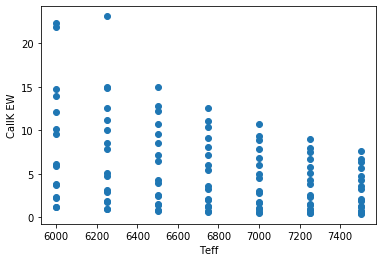

In [3]:
plt.scatter(df["Teff"],df["K"])
plt.xlabel("Teff")
plt.ylabel("CaIIK EW")
plt.show()

In [4]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'level_0', 'index', 'Unnamed: 0.1.1',
       'original_spec_file_name', 'star_name', 'Hbet', 'err_Hbet', 'Hgam',
       'err_Hgam', 'Hdel', 'err_Hdel', 'Heps', 'err_Heps', 'rHgam',
       'err_rHgam', 'balmer', 'err_balmer', 'K', 'err_K', 'phase',
       'final_feh_center', 'final_feh_lower', 'final_feh_upper', 'Teff',
       'logg'],
      dtype='object')

In [6]:
coeffs_es_1 = [12.51368498, -0.78716519, 3.87785116, -0.24297523]
coeffs_ndl_1 = [12.513685, -0.78716521, 3.8778512, -0.24297523]
coeffs_ndl_2 = [12.5096, -0.786677, 3.87640, -0.242800]
coeffs_es_modified_1 = [16.92437966, -0.98640101, 5.2261726, 0.53344007, -0.06341921, 0.27027538, -0.02034332]

coeffs_es_1_exclude_p02 = [12.06978607, -0.7700207,   3.72564696, -0.23753314]
coeffs_es_1_up_to_m05 = [11.99918483, -0.75954517, 3.70118957, -0.2338468]
#coeffs_es_1_up_to_m10 = 

In [25]:
# define function

def feh(coeffs,K,H):
    
    a = coeffs[0]
    b = coeffs[1]
    c = coeffs[2]
    d = coeffs[3]
    
    F = np.divide(K-a-b*H,c+d*H) # the full fraction
    
    numer = K-a-b*H # just the numerator
    denom = c+d*H # just the denominator
    
    return F, numer, denom

In [42]:
# define function

def feh_modified_1(coeffs,K,H):
    
    a = coeffs[0]
    b = coeffs[1]
    c = coeffs[2]
    d = coeffs[3]
    f = coeffs[4]
    g = coeffs[5]
    h = coeffs[6]
    
    gamma = a + b*H - K
    beta = c + d*H + f*np.power(H,2.)
    alpha = g*H + h*np.power(H,2.)
    
    print("gamma:")
    print(gamma)
    print("beta:")
    print(beta)
    print("alpha:")
    print(alpha)
    
    F_plus = np.divide(-beta+np.sqrt(np.power(gamma,2.) - 4*alpha*gamma),2*alpha)
    F_minus = np.divide(-beta-np.sqrt(np.power(gamma,2.) - 4*alpha*gamma),2*alpha)
    
    return F_plus, F_minus, gamma, beta, alpha

In [26]:
# calculate retrievals: original Layden equation

df["retrieved_feh_es_1"], df["numer_es_1"], df["denom_es_1"] = feh(coeffs_es_1_up_to_m05,df["K"],df["balmer"])
#df["retrieved_feh_ndl_1"] = feh(coeffs_ndl_1,df["K"],df["balmer"])
#df["retrieved_feh_ndl_2"] = feh(coeffs_ndl_2,df["K"],df["balmer"])

In [43]:
# calculate retrievals: modified Layden equation

df["retrieved_feh_es_modified_1_plus"], df["retrieved_feh_es_modified_1_minus"], gamma, beta, alpha = feh_modified_1(coeffs_es_modified_1,
                                                                                                                     df["K"],df["balmer"])

gamma:
0       0.029445
1       3.889699
2       7.810286
3      10.283313
4      11.813901
         ...    
106     4.929239
107     5.401395
108     5.752733
109     0.154595
110    -1.104419
Length: 111, dtype: float64
beta:
0      6.252447
1      6.250092
2      6.262438
3      6.240934
4      6.236925
         ...   
106    3.408068
107    3.414438
108    3.472819
109    3.186341
110    3.015279
Name: balmer, Length: 111, dtype: float64
alpha:
0      0.624583
1      0.622336
2      0.634329
3      0.613762
4      0.610085
         ...   
106    0.508972
107    0.510284
108    0.522266
109    0.462845
110    0.426664
Name: balmer, Length: 111, dtype: float64


/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
## TEST  

# calculate retrievals: modified Layden equation

soln_plus, soln_minus, gamma, beta, alpha = feh_modified_1([1.,2.,3.,4.,5.,6.,7.],45,32)

gamma:
20.0
beta:
5251.0
alpha:
7360.0


/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


In [41]:
plt.clf()
plt.scatter(df["final_feh_center"],gamma,label="gamma")
plt.scatter(df["final_feh_center"],beta,label="beta")
plt.scatter(df["final_feh_center"],alpha,label="alpha")
plt.legend()
plt.show()

In [40]:
# calculate numerator and denominators of expression

plt.clf()
plt.scatter(df["final_feh_center"], df["numer_es_1"], label="numerator (K-a-b*H)", s=4)
plt.scatter(df["final_feh_center"], df["denom_es_1"], label="denominator (c+d*H)", s=4)
plt.xlabel("Injected Fe/H")
plt.ylabel("Pieces of\nFe/H = np.divide(K-a-b*H,c+d*H)")
plt.title("Which part of the Layden expression\ncauses Fe/H to diverge at the metal-rich end?")
plt.legend()
plt.axhline(y=0, linestyle=":")
plt.show()

KeyError: 'numer_es_1'

In [11]:
# plot parts of numerator

for i in range(0,len(df)):
    plt.scatter(df["final_feh_center"].iloc[i], -coeffs_es_1[1]*df["balmer"].iloc[i], s=4, color="blue")
    plt.scatter(df["final_feh_center"].iloc[i], df["K"].iloc[i], s=4, color="orange")
    plt.annotate(df["original_spec_file_name"].iloc[i], 
                 xy=(df["final_feh_center"].iloc[i],df["K"].iloc[i]), 
                 xytext=(df["final_feh_center"].iloc[i],df["K"].iloc[i]))
plt.scatter(df["final_feh_center"], -coeffs_es_1[1]*df["balmer"], label = "-b*H", s=4, color="blue")
plt.scatter(df["final_feh_center"], df["K"], label="K", s=4, color="orange")
plt.xlabel("Injected Fe/H")
plt.ylabel("Pieces of\nnumerator")
plt.title("Which part of the numerator\ncauses Fe/H to diverge at the metal-rich end?")
plt.legend()
plt.axhline(y=0, linestyle=":")
plt.show()

In [23]:
plt.clf()
plt.scatter(df["final_feh_center"], df["retrieved_feh_es_1"], label="ES least-squares coeffs:\n[11.99918483, -0.75954517, 3.70118957, -0.2338468]")
#plt.scatter(df["final_feh_center"], df["retrieved_feh_ndl_1"], label="NDL least-squares coeffs:\n[12.513685, -0.78716521, 3.8778512, -0.24297523]")
#plt.scatter(df["final_feh_center"], df["retrieved_feh_ndl_2"], label="NDL LM coeffs\n[12.5096, -0.786677, 3.87640, -0.242800]")
plt.plot([-3,2],[-3,2],linestyle=":")
plt.title("Fe/H from synthetic spectra")
plt.ylabel("Retrieved Fe/H values")
plt.xlabel("Injected Fe/H values")
plt.ylim([-3,5])
plt.legend()
plt.show()

In [38]:
# Retrievals from modified Fe/H expression

plt.clf()
plt.scatter(df["final_feh_center"], df["retrieved_feh_es_modified_1_plus"], label="Plus value")
plt.scatter(df["final_feh_center"], df["retrieved_feh_es_modified_1_minus"], label="Minus value")
#plt.scatter(df["final_feh_center"], df["retrieved_feh_ndl_1"], label="NDL least-squares coeffs:\n[12.513685, -0.78716521, 3.8778512, -0.24297523]")
#plt.scatter(df["final_feh_center"], df["retrieved_feh_ndl_2"], label="NDL LM coeffs\n[12.5096, -0.786677, 3.87640, -0.242800]")
plt.plot([-3,2],[-3,2],linestyle=":")
plt.title("Fe/H from synthetic spectra")
plt.ylabel("Retrieved Fe/H values")
plt.xlabel("Injected Fe/H values")
#plt.ylim([-3,5])
plt.legend()
plt.show()

In [9]:
df["original_spec_file_name"].drop_duplicates()

0      600025m05.smo
1      600025m10.smo
2      600025m15.smo
3      600025m20.smo
4      600025m25.smo
           ...      
106    750030m20.smo
107    750030m25.smo
108    750030m30.smo
109    750030p00.smo
110    750030p02.smo
Name: original_spec_file_name, Length: 111, dtype: object